In [19]:
import torch

import torch.nn as nn

#from nvae.utils import add_sn
#from nvae.vae_celeba import NVAE
import numpy as np
import matplotlib.pyplot as plt
#from nvae.utils import reparameterize
from torchvision import datasets, transforms


import os


In [20]:
device = ("cuda:0" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

from vae import VAE_big

model = VAE_big(device, image_channels=3).to(device)

train_data_size = 162079
epochs = 199
beta_value = 5.0

# For Beta VAE with Beta  = 5.0 min and maximum damaged images

## Your VAE specific min and max segments

In [21]:


prev_div_min = 100.0
prev_div_max = 0.0
all_losses = []

segment = 9

all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]
feature = all_features[3]


for feature in all_features:
    for segment in range(60):
        desired_norm_l_inf = 0.094

        #all_features = ["bald", "beard", "oldfemaleGlass", "hat"]#, "generalWhiteWomen", "blackWomen"]

        universal_features_list = ["bald", "beard", "oldfemaleGlass", "hat", "blackWomen", "generalWhiteWomen", "blackMen", "generalWhiteMen", "men", "women", "young", "old", "youngmen", "oldmen", "youngwomen", "oldwomen" ]



        source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[segment].unsqueeze(0).to(device) 


        if(beta_value == 5.0 or beta_value == 10.0): 
            model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
            optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"beta"+str(beta_value)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 
        else:
            model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
            optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 
        model.eval()


        image_height, image_width, _ = source_im[0].cpu().detach().permute(1, 2, 0).cpu().numpy().shape
        aspect_ratio = image_width / image_height

        corresponding_class_polulations = [1819, 24707, 145, 2827]
        #inside_feature_name = inside_feature_names[3]



        actualOutput, _, _ = model(source_im)
        ActualReconLoss = torch.sqrt((actualOutput - source_im)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()


        DivAttackeImage = source_im + optimized_noise
        NormalDivAttackeImage = (DivAttackeImage - DivAttackeImage.min())/(DivAttackeImage.max() - DivAttackeImage.min())
        DivOutput,_,_ = model(NormalDivAttackeImage)
        DivOutputL2ActualOutput = torch.sqrt((DivOutput - actualOutput)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()

        all_losses.append(DivOutputL2ActualOutput.item())

all_losses

[0.07615318149328232,
 0.07971170544624329,
 0.07004508376121521,
 0.06964538991451263,
 0.05460166931152344,
 0.06039051711559296,
 0.06922425329685211,
 0.06400088965892792,
 0.04771554470062256,
 0.06288523972034454,
 0.184390589594841,
 0.06866616010665894,
 0.10820122808218002,
 0.05670561641454697,
 0.09623824059963226,
 0.06577223539352417,
 0.07688727974891663,
 0.051496293395757675,
 0.1014469712972641,
 0.07419104129076004,
 0.06721234321594238,
 0.06530766934156418,
 0.09197121113538742,
 0.07486417889595032,
 0.06355525553226471,
 0.06683003902435303,
 0.06560900062322617,
 0.08843527734279633,
 0.08430524915456772,
 0.12849822640419006,
 0.05310541018843651,
 0.07466074079275131,
 0.06733501702547073,
 0.10526864230632782,
 0.05933116376399994,
 0.05963137000799179,
 0.07188154757022858,
 0.0710996463894844,
 0.11308039724826813,
 0.09602564573287964,
 0.08115296065807343,
 0.05711398646235466,
 0.058908648788928986,
 0.06544782221317291,
 0.06341466307640076,
 0.059076946

In [22]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d/men_disjoined'
all_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d'
all_men_list = os.listdir(all_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all men List: ", len(all_men_list))



#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d/women_disjoined'
all_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d'
all_women_list = os.listdir(all_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all women List: ", len(all_women_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_young_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d/young_disjoined'
all_young_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d'
all_young_list = os.listdir(all_young_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all young List: ", len(all_young_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_old_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d/old_disjoined'
all_old_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d'
all_old_list = os.listdir(all_old_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all old List: ", len(all_old_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d/youngMen_disjoined'
young_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d'
young_men_list = os.listdir(young_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young men List: ", len(young_men_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d/oldMen_disjoined'
old_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d'
old_men_list = os.listdir(old_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old men List: ", len(old_men_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d/oldWomen_disjoined'
old_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d'
old_women_list = os.listdir(old_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old women List: ", len(old_women_list))



#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d/youngWomen_disjoined'
young_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d'
young_women_list = os.listdir(young_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young women List: ", len(young_women_list))


all men List:  84434
all women List:  118165
all young List:  156734
all old List:  45865
young men List:  53447
old men List:  7003
old women List:  1116
young women List:  103287


In [33]:
desired_norm_l_inf = 0.094
#universal_features_list = ["bald", "beard", "oldfemaleGlass", "hat", "blackWomen", "generalWhiteWomen", "blackMen", "generalWhiteMen", "men", "women", "young", "old", "youngmen", "oldmen", "youngwomen", "oldwomen" ]
all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]
feature = all_features[3]

all_source_images = torch.tensor([]).to(device)
for feature in all_features:
    source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[:60].to(device) 
    all_source_images = torch.cat((all_source_images, source_im), dim=0)

In [34]:
all_source_images.shape

torch.Size([240, 3, 64, 64])

# Autoencode and TSNE  to get them uin 2d

In [35]:
model.eval()
with torch.no_grad():
    ae_perturbed_embeds = model.encoder(all_source_images) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
    mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
    std1 = logvar1.mul(0.5).exp_()
    esp1 = torch.randn(*mu1.size()).to(device)
    attackeded_z1 = mu1 + std1 * esp1
print("z1.shape", attackeded_z1.shape)


z1.shape torch.Size([240, 256])


In [36]:
parent_addresses = [all_men_parent, all_women_parent, all_young_parent, all_old_parent, young_men_parent, old_men_parent, young_women_parent, old_women_parent]
considered_lists = [all_men_list, all_women_list, all_young_list, all_old_list, young_men_list, old_men_list, young_women_list, old_women_list]

In [37]:
all_latent_groups_merged = torch.tensor([]).to(device)

for ind in range(4, 8):
    print("ind: ", ind)
    transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor()
            ])

    batch_size = 1000

    print("parent_addresses[ind]: ", parent_addresses[ind])

    celeba_data = datasets.ImageFolder(parent_addresses[ind], transform=transform)
    print("celeba_data: ", len(celeba_data))
    considered_list = considered_lists[ind]

    print("considered_list: ", len(considered_list))

    train_set, test_set = torch.utils.data.random_split(celeba_data, [int(len(considered_list) * 1.0), len(considered_list) - int(len(considered_list) * 1.0)])
    train_data_size = len(train_set)
    test_data_size = len(test_set)

    trainLoader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)


    for idx, (image, label) in enumerate(trainLoader):
        images, label = image.to(device), label.to(device)
        break


    model.eval()
    with torch.no_grad():
        ae_perturbed_embeds = model.encoder(images) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
        mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
        std1 = logvar1.mul(0.5).exp_()
        esp1 = torch.randn(*mu1.size()).to(device)
        z1 = mu1 + std1 * esp1
    print("z1.shape", z1.shape)
    all_latent_groups_merged = torch.cat((all_latent_groups_merged, z1), 0)
    print("all_latent_groups_merged.shape", all_latent_groups_merged.shape)


ind:  4
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d
celeba_data:  53447
considered_list:  53447
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([1000, 256])
ind:  5
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d
celeba_data:  7003
considered_list:  7003
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([2000, 256])
ind:  6
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d
celeba_data:  103287
considered_list:  103287
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([3000, 256])
ind:  7
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d
celeba_data:  1116
considered_list:  1116
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([40

In [38]:
all_latent_groups_merged = torch.cat((all_latent_groups_merged, attackeded_z1), 0)


In [39]:
all_latent_groups_merged.shape

torch.Size([4240, 256])

In [40]:
import torch
import numpy as np
from openTSNE import TSNE
from openTSNE.affinity import PerplexityBasedNN

# Check if a GPU is available
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Assuming your data is a torch tensor of size [63325, 256]
#data = torch.randn(63325, 256)  # Example tensor
data = all_latent_groups_merged.to(device)

# Convert the tensor to a NumPy array
data_np = data.cpu().numpy()

# Perform t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    metric="cosine",
    n_jobs=-1,
    random_state=42,
    negative_gradient_method="fft"  # Use FFT-based gradient calculation for speed
)

# Fit and transform the data
embedding = tsne.fit(data_np)

# Convert the result back to a torch tensor
data_tsne_tensor = torch.tensor(embedding, device=device)

# Check the size of the reduced tensor
print(data_tsne_tensor.shape)  # Should print torch.Size([63325, 2])


torch.Size([4240, 2])


In [41]:
data_tsne_tensor = data_tsne_tensor.cpu().numpy()   

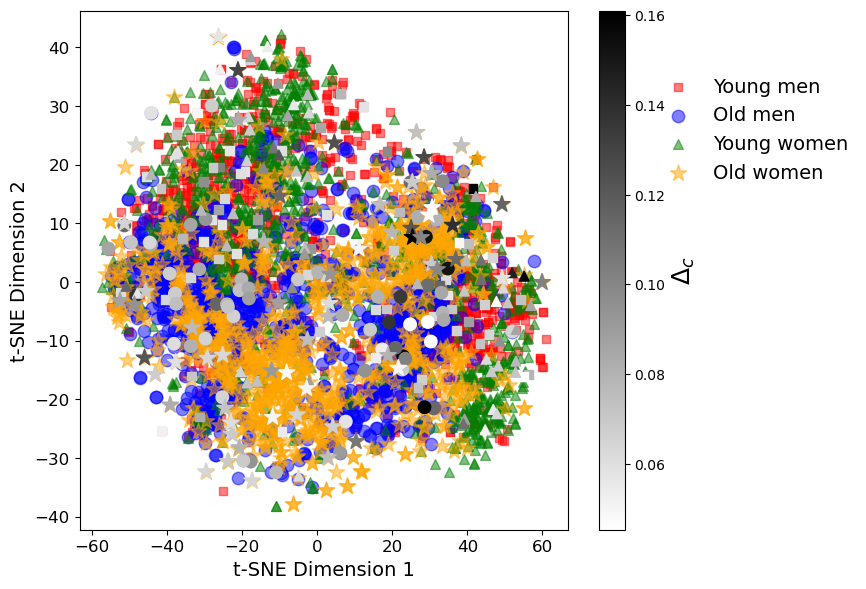

In [42]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

fig, ax = plt.subplots(figsize=(10, 6))
# Set the background color of the plot
#fig.patch.set_facecolor('skyblue')
#ax.set_facecolor('skyblue')


# Plot each group separately with specified colors and labels
ax.scatter(data_tsne_tensor[0*batch_size:1*batch_size, 0], data_tsne_tensor[0*batch_size:1*batch_size, 1], color=colors[0], label=labels[0], alpha=0.5, marker='s',  s=40)
ax.scatter(data_tsne_tensor[1*batch_size:2*batch_size, 0], data_tsne_tensor[1*batch_size:2*batch_size, 1], color=colors[1], label=labels[1], alpha=0.5, marker='o',  s=80)
ax.scatter(data_tsne_tensor[2*batch_size:3*batch_size, 0], data_tsne_tensor[2*batch_size:3*batch_size, 1], color=colors[2], label=labels[2], alpha=0.5, marker='^',  s=50)
ax.scatter(data_tsne_tensor[3*batch_size:4*batch_size, 0], data_tsne_tensor[3*batch_size:4*batch_size, 1], color=colors[3], label=labels[3], alpha=0.5, marker='*',  s=150)

#plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
scatter = ax.scatter(data_tsne_tensor[4000:4060, 0], data_tsne_tensor[4000:4060, 1], c=all_losses_normalized[:60], cmap='gray_r', marker='s',  s=40)
scatter = ax.scatter(data_tsne_tensor[4060:4120, 0], data_tsne_tensor[4060:4120, 1], c=all_losses_normalized[60:120], cmap='gray_r', marker='o',  s=80)
scatter = ax.scatter(data_tsne_tensor[4120:4180, 0], data_tsne_tensor[4120:4180, 1], c=all_losses_normalized[120:180], cmap='gray_r', marker='^',  s=50)
scatter = ax.scatter(data_tsne_tensor[4180:, 0], data_tsne_tensor[4180:, 1], c=all_losses_normalized[180:240], cmap='gray_r', marker='*',  s=150)

cbar = plt.colorbar(scatter)
cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()

# Add legend and place it outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=3., frameon=False, fontsize=14)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


# Pulling tendencies